<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl_2/blob/main/Epid_T6_SIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
n = 10  # vertices
m = 20  # arcos
seed = 2016  # semilla para generador de números aleatorios

G = nx.gnm_random_graph(n, m, seed=seed)

print("Lista de Adyacencias")
for line in nx.generate_adjlist(G):
    print(line)

Lista de Adyacencias
0 9 5 6
1 4 7 8 6 2
2 4 5 7
3 5 4 6 9
4 9 7
5 7
6
7 8
8 9
9


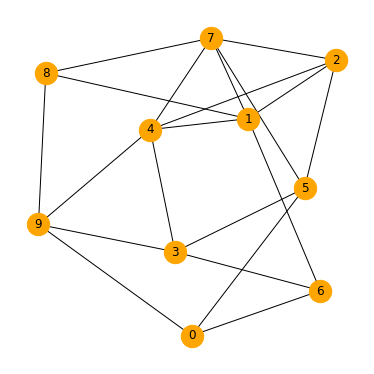

In [3]:
plt.figure(1,figsize=(5,5))
pos = nx.spring_layout(G, seed=seed)  #para mantener la misma posición
nx.draw(G, with_labels=True,node_color="orange",pos=pos,node_size=500)
plt.show()

In [4]:
print("Matriz de Adyacencias")
A = nx.to_numpy_matrix(G)
A

Matriz de Adyacencias


matrix([[0., 0., 0., 0., 0., 1., 1., 0., 0., 1.],
        [0., 0., 1., 0., 1., 0., 1., 1., 1., 0.],
        [0., 1., 0., 0., 1., 1., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 1., 1., 0., 0., 1.],
        [0., 1., 1., 1., 0., 0., 0., 1., 0., 1.],
        [1., 0., 1., 1., 0., 0., 0., 1., 0., 0.],
        [1., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 1., 0., 1., 1., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
        [1., 0., 0., 1., 1., 0., 0., 0., 1., 0.]])

Resdes GNP

In [5]:
n = 10  # vertices
p = 0.5  # probability
seed = 2016  # semilla para generador de números aleatorios

G = nx.gnp_random_graph(n, p, seed=seed)

Redes dada una sucesion de grados

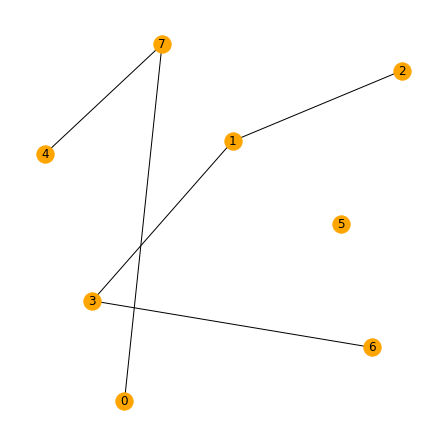

In [16]:
ks=[1,2,1,2,1,0,1,2]
G = nx.configuration_model(ks)
plt.figure(1,figsize=(6,6))
nx.draw(G, with_labels=True,node_color="orange",pos=pos)
plt.show()

In [19]:
import numpy as np
np.random.seed(0)
k = np.random.poisson(5, 100)  #generamos 100 vertices con grado Poisson(5)
print("Sucesión de Grados")
print(k)
sg = k.tolist()
print("La suma de grados debe ser par")
print(sum(sg))
G = nx.configuration_model(sg)

Sucesión de Grados
[ 9  5  6  5  5  8  4  5  4  3  3  7  3  3  4  5  2  1  7  7 10  5  8  8
  6  4  4  3  1  5  6  5  5  4  1  7  2  7  6  2  6  5  7  5  4  5 10  6
  4  7  3  2  2  6  2  5  3  6  2  4  4  4  8  7 11  3  4  1  4  5  1  2
  2  5  5  5  7  8  4  6  4 10  3  8  5  7  3  8  2  1  4  4  4  4  6  4
 12  1  6  3]
La suma de grados debe ser par
484


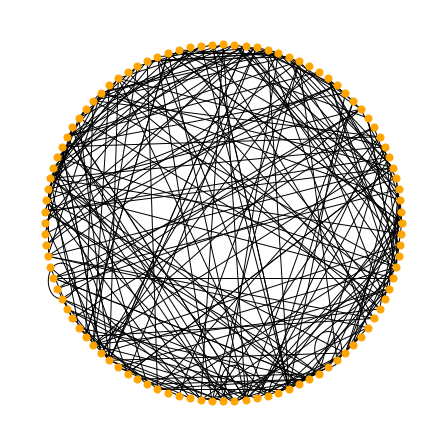

In [20]:
plt.figure(1,figsize=(6,6))
nx.draw(G, with_labels=False,node_color="orange",pos=nx.circular_layout(G),node_size=50)

<BarContainer object of 12 artists>

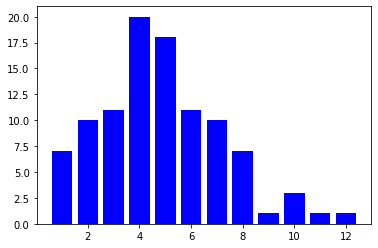

In [22]:
import collections
degree_sequence = sorted([d for n,d in G.degree()], reverse=True) 
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
plt.bar(deg, cnt, width=0.80, color='b')

Modelos en redes.

In [23]:
!pip install EoN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 113 kB 5.3 MB/s 
  Created wheel for EoN: filename=EoN-1.1-py3-none-any.whl size=120818 sha256=762c1befd9adedd0f988fce926fca5291218b63651dbbc405305748d347ed4fb
  Stored in directory: /root/.cache/pip/wheels/0b/c0/a4/d6001fd809cb84c027ada5c2ab3b6d1cb2e97fec3f9978eae7
Successfully built EoN


In [24]:
import EoN

import networkx as nx
from matplotlib import rc
import matplotlib.pylab as plt

#import scipy
#import random
import numpy as np

import scipy.stats as stats

Caso de una red 3-regular.

In [35]:
G = nx.random_regular_graph(d=3,n=1000,seed=0)

In [36]:
plt.figure(1,figsize=(5,5))
pos = nx.spring_layout(G, seed=seed)  #para mantener la misma posición


<Figure size 360x360 with 0 Axes>

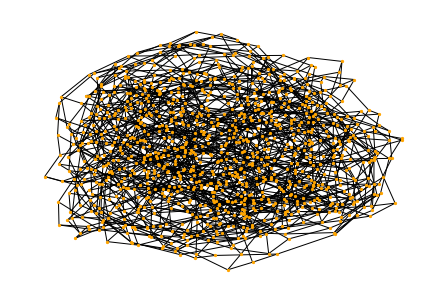

In [40]:
nx.draw(G, with_labels=False,node_color="orange",pos=pos,node_size=5)
plt.show()

In [ ]:
tmax = 20
iterations = 20   # corre 20 simulaciones
R = 0.2        # tasa de transmisión
gamma = 1.0      # tasa de recuperación
rho = 0.005      # fracción aleatoria de casos infectados iniciales

for i in range(iterations): # corre la simulaciones
    t, S, I, R = EoN.fast_SIR(G, R, gamma, rho=rho, tmax = tmax)
    if i == 0:
        plt.plot(t, I, color = 'k', alpha=0.3, label='Simulation')
    plt.plot(t, I, color = 'k', alpha=0.3)

# Ejercicio 3.

In [58]:
N=1000
tau = 0.5       # tasa de transmisión
gamma = 0.1     # tasa de recuperación
#ts = scipy.arange(0,40,0.05)
count = 100      # number of simulations to run for each
colors = ['#5AB3E6','#FF2000','#009A80','#E69A00', '#CD9AB3', '#0073B3',
        '#F0E442']

def sir_sim(k_poiss, N, color, label, count):
    report_times = np.arange(0,30,0.1) #scipy.linspace(0,30,3000)
    sums = 0*report_times
    I_s=[]
    for cnt in range(count):
        G = nx.configuration_model(k_poiss)
        t, S, I, R = EoN.fast_SIR(G, tau, gamma, initial_infecteds=0)#initial_infecteds es el nodo infectado.
        I_s.append(I[-1])
    return(I_s)

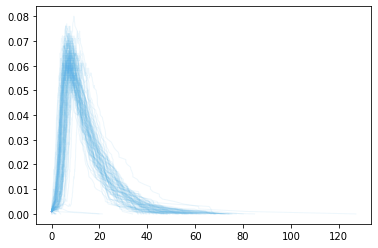

In [57]:
for count_k in range(1000):
  np.random.seed(count_k)
  ksum=1
  while(ksum%2!=0):
    k=np.random.poisson(3.5,100)
    ksum=sum(k)
  I_s_k=sir_sim(k_poiss=k,N=N,color=colors[0],label='poiss',count=count)
